# AI Census

AI Project, which predicts whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.

## Data Set Information

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.

## Attribute Information

| Attribute      | Description |
|----------------| --- |
| age            | Continuous numerical value representing the age of an individual |
| workclass      | Categorical value representing the type of employment of an individual, with options including Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, and Never-worked |
| fnlwgt         | Estimate of the number of people in the US that have the same demographic characteristics as the person in the row |
| education      | Categorical value representing the level of education of an individual, with options including Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, and Preschool |
| education-num  | Continuous numerical value representing the number of years of education completed by an individual |
| marital-status | Categorical value representing the marital status of an individual, with options including Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, and Married-AF-spouse |
| occupation     | Categorical value representing the type of occupation of an individual, with options including Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, and Armed-Forces |
| relationship   | Categorical value representing the relationship of an individual to others in the household, with options including Wife, Own-child, Husband, Not-in-family, Other-relative, and Unmarried |
| race           | Categorical value representing the race of an individual, with options including White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, and Black |
| sex            | Categorical value representing the gender of an individual, with options including Female and Male |
| capital-gain   | Continuous numerical value representing the capital gain of an individual |
| capital-loss   | Continuous numerical value representing the capital loss of an individual |
| hours-per-week | Continuous numerical value representing the number of hours worked per week by an individual |
| native-country | Categorical value representing the native country of an individual, with options including United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, and Holand-Netherlands |
| class          | Categorical value representing the income of an individual, with options including >50K and <=50K |

## Data Exploration

The data exploration phase involves analyzing the dataset to understand the distribution of the variables, identifying any missing or outliers, and determining which features are relevant for the prediction phase.

### Importing the libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

### Importing the dataset

In [2]:
# define global random state
RANDOM_STATE = 42

In [3]:
column_names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary"]



df_data = pd.read_csv('input/adult.data', names=column_names, index_col=False)
df_test = pd.read_csv('input/adult.test', names=column_names, index_col=False)

# remove the dot from the salary column in the test dataset
df_test['salary'] = df_test['salary'].str.replace('.', '', regex=False)

df_census = pd.concat([df_data, df_test], axis=0)

df_census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  salary          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


When analyzing the dataset, it is essential to have a look missing values, because these have to be treated before the training phase.

In [6]:
df_census.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

 In the case of our dataset, there are no missing values.


### Analyse the different values of each column

In [7]:
for column in df_census.columns:
    print('----------------------------------------')
    print(f"{column}: {df_census[column].unique()}")

----------------------------------------
age: [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
----------------------------------------
workclass: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
----------------------------------------
fnlwgt: [ 77516  83311 215646 ... 173449  89686 350977]
----------------------------------------
education: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
----------------------------------------
education-num: [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
----------------------------------------
marital-status: [' Never-married' ' Married-civ-spouse' ' Divorce

From the above output we can see that some string columns have leading whitespaces which should be removed.

In [8]:
for column in df_census.columns:
    if df_census[column].dtype == 'object':
        df_census[column] = df_census[column].str.strip()

In [9]:
for column in df_census.columns:
    print('----------------------------------------')
    print(f"{column}: {df_census[column].unique()}")

----------------------------------------
age: [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
----------------------------------------
workclass: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
----------------------------------------
fnlwgt: [ 77516  83311 215646 ... 173449  89686 350977]
----------------------------------------
education: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
----------------------------------------
education-num: [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
----------------------------------------
marital-status: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 

In [10]:
df_census.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### Analyse the distribution of the numerical columns

In [11]:
df_census['age'].value_counts().sort_index()

17     595
18     862
19    1053
20    1113
21    1096
      ... 
86       1
87       3
88       6
89       2
90      55
Name: age, Length: 74, dtype: int64

We can see that the peoples ages reaches from 17 to 90 years old.

In [12]:
df_census['education-num'].value_counts().sort_index()

1        83
2       247
3       509
4       955
5       756
6      1389
7      1812
8       657
9     15784
10    10878
11     2061
12     1601
13     8025
14     2657
15      834
16      594
Name: education-num, dtype: int64

We can see that the peoples education-num, which is the number of years of education completed by an individual, reaches from 1 to 16 years and the most common value is 9 and the other are approximately evenly distributed.

In [13]:
df_census['capital-gain'].value_counts().sort_index()

0        44807
114          8
401          5
594         52
914         10
         ...  
25236       14
27828       58
34095        6
41310        3
99999      244
Name: capital-gain, Length: 123, dtype: int64

In [14]:
df_census['capital-loss'].value_counts().sort_index()

0       46560
155         1
213         5
323         5
419         3
        ...  
3175        2
3683        2
3770        4
3900        2
4356        3
Name: capital-loss, Length: 99, dtype: int64

In [15]:
df_census['hours-per-week'].value_counts().sort_index()

1      27
2      53
3      59
4      84
5      95
     ... 
95      2
96      9
97      2
98     14
99    137
Name: hours-per-week, Length: 96, dtype: int64

In [16]:
df_census['salary'].value_counts()

<=50K    37155
>50K     11687
Name: salary, dtype: int64

We can see that the dataset is imbalanced, because the number of people with salary <=50K is much higher than the number of people with salary >50K.

## Data Visualization

Data visualization helps to understand the relationship between different variables and identify patterns in the data.
It allows to detect outliers and trends that might not be apparent from a simple statistical summary.

### Importing the libraries

In [17]:
import matplotlib.pyplot as plt

### Visualizing the data

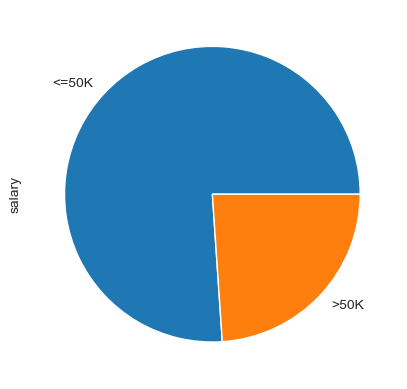

In [18]:
df_census['salary'].value_counts().plot(kind='pie');

### Analyse Education

<AxesSubplot: xlabel='salary', ylabel='education-num'>

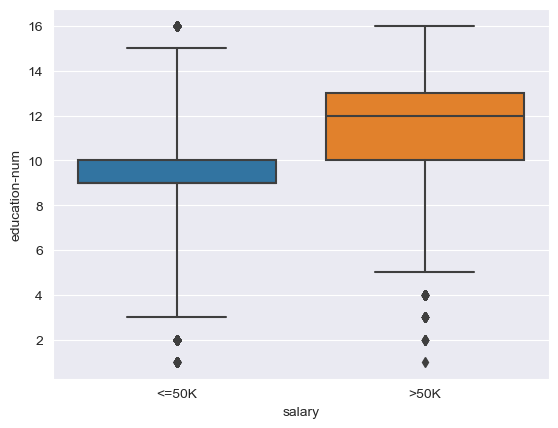

In [19]:
sns.boxplot(data=df_census, x='salary', y='education-num', whis=[1, 99])

<AxesSubplot: xlabel='education-num', ylabel='Count'>

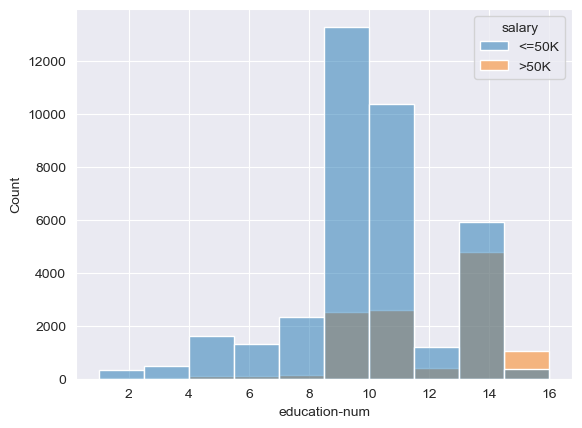

In [20]:
sns.histplot(data=df_census, x='education-num', hue='salary', bins=10)

<AxesSubplot: xlabel='education-num', ylabel='Count'>

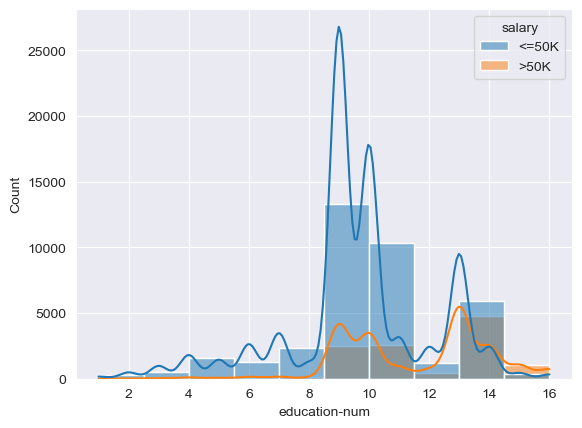

In [21]:
sns.histplot(data=df_census, x='education-num', hue='salary', bins=10, kde=True)

### Analyze Age

<AxesSubplot: xlabel='salary', ylabel='age'>

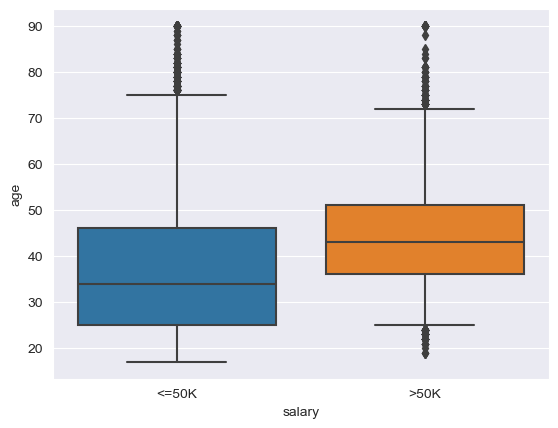

In [22]:
sns.boxplot(data=df_census, x='salary', y='age', whis=[1, 99])

<AxesSubplot: xlabel='age', ylabel='Count'>

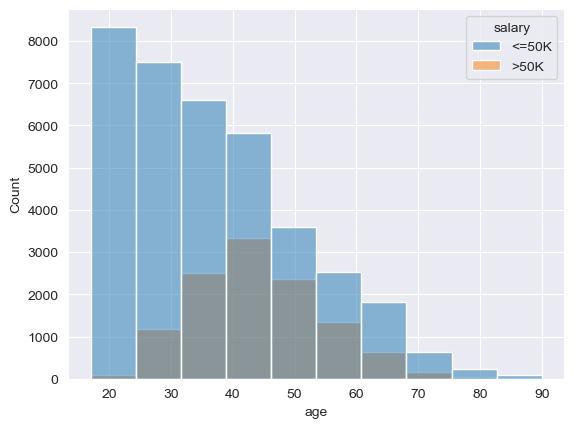

In [23]:
sns.histplot(data=df_census, x='age', hue='salary', bins=10)

<AxesSubplot: xlabel='age', ylabel='Count'>

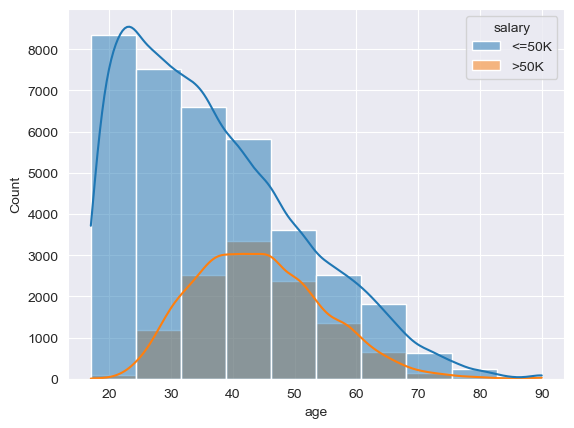

In [24]:
sns.histplot(data=df_census, x='age', hue='salary', bins=10, kde=True)

### Analyze Capital-gain

<AxesSubplot: xlabel='salary', ylabel='capital-gain'>

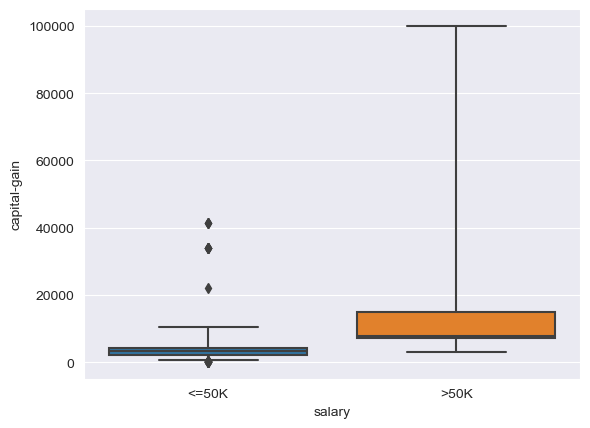

In [25]:
sns.boxplot(data=df_census[df_census['capital-gain'] != 0], x='salary', y='capital-gain', whis=[1, 99])

<AxesSubplot: xlabel='capital-gain', ylabel='Count'>

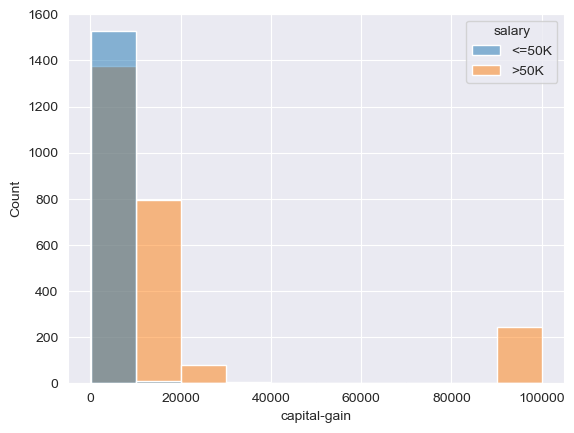

In [26]:
sns.histplot(data=df_census[df_census['capital-gain'] != 0], x='capital-gain', hue='salary', bins=10)

<AxesSubplot: xlabel='capital-gain', ylabel='Count'>

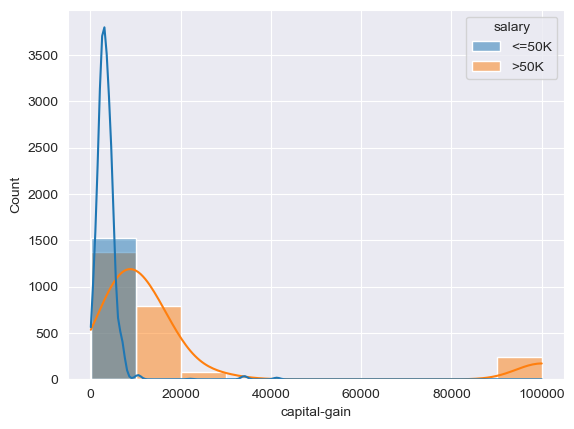

In [27]:
sns.histplot(data=df_census[df_census['capital-gain'] != 0], x='capital-gain', hue='salary', bins=10, kde=True)

### Analyze Capital-loss

<AxesSubplot: xlabel='salary', ylabel='capital-loss'>

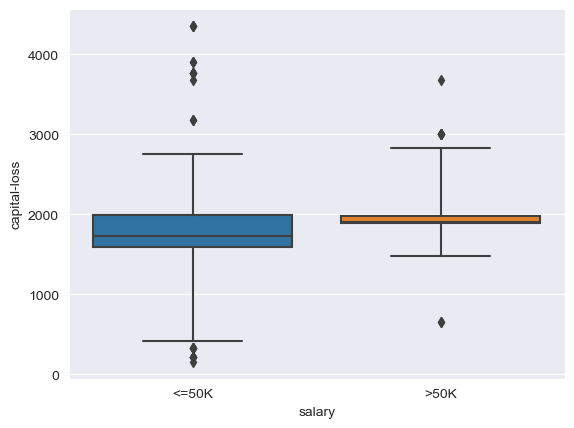

In [28]:
sns.boxplot(data=df_census[df_census['capital-loss'] != 0], x='salary', y='capital-loss', whis=[1, 99])

<AxesSubplot: xlabel='capital-loss', ylabel='Count'>

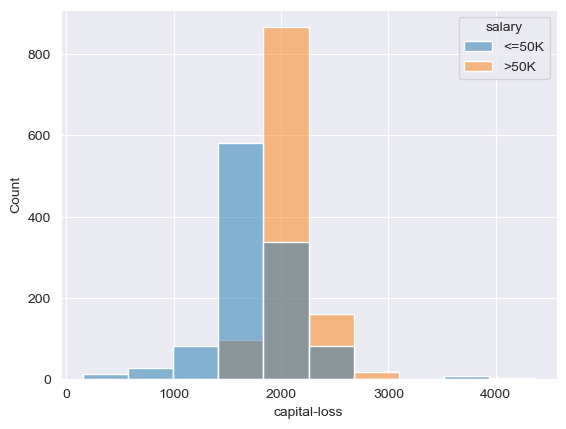

In [29]:
sns.histplot(data=df_census[df_census['capital-loss'] != 0], x='capital-loss', hue='salary', bins=10)

<AxesSubplot: xlabel='capital-loss', ylabel='Count'>

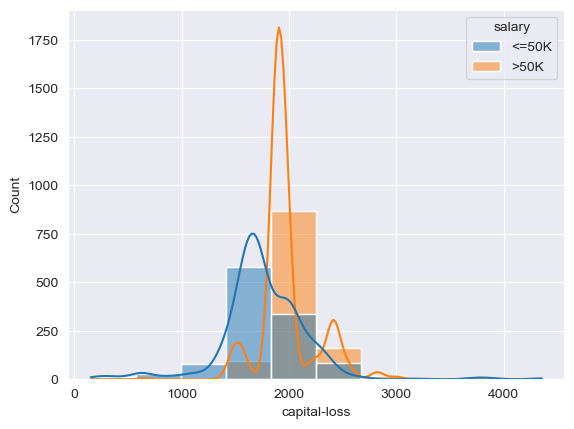

In [30]:
sns.histplot(data=df_census[df_census['capital-loss'] != 0], x='capital-loss', hue='salary', bins=10, kde=True)

### Analyze Hours-per-week

<AxesSubplot: xlabel='salary', ylabel='hours-per-week'>

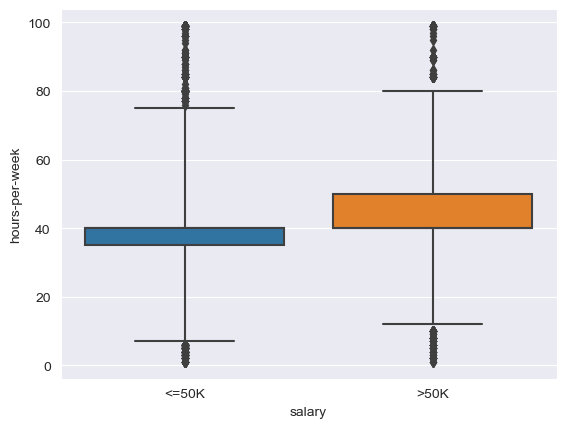

In [31]:
sns.boxplot(data=df_census, x='salary', y='hours-per-week', whis=[1, 99])

<AxesSubplot: xlabel='hours-per-week', ylabel='Count'>

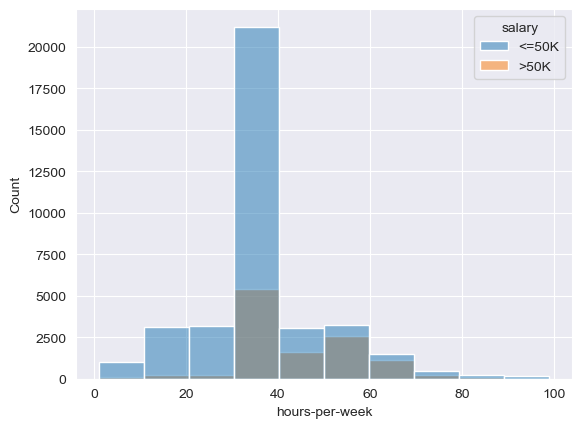

In [32]:
sns.histplot(data=df_census, x='hours-per-week', hue='salary', bins=10)

<AxesSubplot: xlabel='hours-per-week', ylabel='Count'>

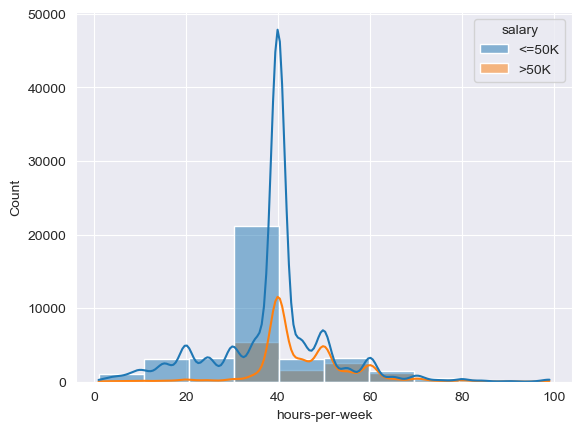

In [33]:
sns.histplot(data=df_census, x='hours-per-week', hue='salary', bins=10, kde=True)

In [34]:
df_census.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## Data Preprocessing

Data preprocessing is the process of cleaning and formatting the data to make it suitable for training the model.
This might include filling in missing values, normalizing the data, and encoding categorical variables.

First we change the salary column to either 0 if they earn less than 50K a year or 1 for more than 50K a year.

In [35]:
df_census['salary'] = df_census['salary'].map(lambda salary: 0 if salary == '<=50K' else 1)

In [36]:
df_census

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,0
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


Next we change the sex column to either 1 for male or 0 for female.

In [37]:
df_census['sex'] = df_census['sex'].map(lambda sex: 1 if sex == 'Male' else 0)

In [38]:
df_census

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,0,0,0,36,United-States,0
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,1,0,0,40,United-States,0
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,1,0,0,50,United-States,0
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,1,5455,0,40,United-States,0


Now we use the OneHotEncoder to convert the race column.

In [39]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False)

one_hot_raw = pd.DataFrame(one_hot_encoder.fit_transform(df_census[['race']]), columns=one_hot_encoder.get_feature_names_out())
df_census.reset_index(inplace=True, drop=True)
df_census = pd.concat([df_census, one_hot_raw], axis=1)
df_census.drop(['race'], axis=1, inplace=True)

df_census

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,1,2174,0,40,United-States,0,0.0,0.0,0.0,0.0,1.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,1,0,0,13,United-States,0,0.0,0.0,0.0,0.0,1.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,1,0,0,40,United-States,0,0.0,0.0,0.0,0.0,1.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,1,0,0,40,United-States,0,0.0,0.0,1.0,0.0,0.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,0,0,0,40,Cuba,0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,0,0,0,36,United-States,0,0.0,0.0,0.0,0.0,1.0
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,1,0,0,40,United-States,0,0.0,0.0,1.0,0.0,0.0
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,1,0,0,50,United-States,0,0.0,0.0,0.0,0.0,1.0
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,1,5455,0,40,United-States,0,0.0,1.0,0.0,0.0,0.0


Same goes for the relationship column.

In [40]:
one_hot_raw = pd.DataFrame(one_hot_encoder.fit_transform(df_census[['relationship']]), columns=one_hot_encoder.get_feature_names_out())
df_census = pd.concat([df_census, one_hot_raw], axis=1)
df_census.drop(['relationship'], axis=1, inplace=True)

df_census

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,sex,capital-gain,capital-loss,...,race_Asian-Pac-Islander,race_Black,race_Other,race_White,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,1,2174,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,1,0,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,1,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,1,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,0,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
48838,64,?,321403,HS-grad,9,Widowed,?,1,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,1,0,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,1,5455,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


We can use an ordinal encoder here to convert the education column to numeric values.

In [41]:
from sklearn.preprocessing import OrdinalEncoder

education_ordered = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']
ordinal_encoder = OrdinalEncoder(categories=[education_ordered])

df_census[['education']] = ordinal_encoder.fit_transform(df_census[['education']])

df_census

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,sex,capital-gain,capital-loss,...,race_Asian-Pac-Islander,race_Black,race_Other,race_White,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,39,State-gov,77516,12.0,13,Never-married,Adm-clerical,1,2174,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,50,Self-emp-not-inc,83311,12.0,13,Married-civ-spouse,Exec-managerial,1,0,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,38,Private,215646,8.0,9,Divorced,Handlers-cleaners,1,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,53,Private,234721,6.0,7,Married-civ-spouse,Handlers-cleaners,1,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,28,Private,338409,12.0,13,Married-civ-spouse,Prof-specialty,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,12.0,13,Divorced,Prof-specialty,0,0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
48838,64,?,321403,8.0,9,Widowed,?,1,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48839,38,Private,374983,12.0,13,Married-civ-spouse,Prof-specialty,1,0,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
48840,44,Private,83891,12.0,13,Divorced,Adm-clerical,1,5455,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


We can use the OneHotEncoder again to convert the workclass column.

In [42]:
one_hot_raw = pd.DataFrame(one_hot_encoder.fit_transform(df_census[['workclass']]), columns=one_hot_encoder.get_feature_names_out())
df_census = pd.concat([df_census, one_hot_raw], axis=1)
df_census.drop(['workclass'], axis=1, inplace=True)

df_census

,age,fnlwgt,education,education-num,marital-status,occupation,sex,capital-gain,capital-loss,hours-per-week,...,relationship_Wife,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,39,77516,12.0,13,Never-married,Adm-clerical,1,2174,0,40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,50,83311,12.0,13,Married-civ-spouse,Exec-managerial,1,0,0,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,215646,8.0,9,Divorced,Handlers-cleaners,1,0,0,40,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,53,234721,6.0,7,Married-civ-spouse,Handlers-cleaners,1,0,0,40,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,28,338409,12.0,13,Married-civ-spouse,Prof-specialty,0,0,0,40,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,215419,12.0,13,Divorced,Prof-specialty,0,0,0,36,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
48838,64,321403,8.0,9,Widowed,?,1,0,0,40,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48839,38,374983,12.0,13,Married-civ-spouse,Prof-specialty,1,0,0,50,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
48840,44,83891,12.0,13,Divorced,Adm-clerical,1,5455,0,40,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Same goes for the maritial-status column.

In [43]:
one_hot_raw = pd.DataFrame(one_hot_encoder.fit_transform(df_census[['marital-status']]), columns=one_hot_encoder.get_feature_names_out())
df_census = pd.concat([df_census, one_hot_raw], axis=1)
df_census.drop(['marital-status'], axis=1, inplace=True)

df_census

,age,fnlwgt,education,education-num,occupation,sex,capital-gain,capital-loss,hours-per-week,native-country,...,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed
0,39,77516,12.0,13,Adm-clerical,1,2174,0,40,United-States,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,83311,12.0,13,Exec-managerial,1,0,0,13,United-States,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,38,215646,8.0,9,Handlers-cleaners,1,0,0,40,United-States,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,53,234721,6.0,7,Handlers-cleaners,1,0,0,40,United-States,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,28,338409,12.0,13,Prof-specialty,0,0,0,40,Cuba,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,215419,12.0,13,Prof-specialty,0,0,0,36,United-States,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
48838,64,321403,8.0,9,?,1,0,0,40,United-States,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
48839,38,374983,12.0,13,Prof-specialty,1,0,0,50,United-States,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
48840,44,83891,12.0,13,Adm-clerical,1,5455,0,40,United-States,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


We can also do this with the occupation column.

In [44]:
one_hot_raw = pd.DataFrame(one_hot_encoder.fit_transform(df_census[['occupation']]), columns=one_hot_encoder.get_feature_names_out())
df_census = pd.concat([df_census, one_hot_raw], axis=1)
df_census.drop(['occupation'], axis=1, inplace=True)

df_census

,age,fnlwgt,education,education-num,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,39,77516,12.0,13,1,2174,0,40,United-States,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50,83311,12.0,13,1,0,0,13,United-States,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38,215646,8.0,9,1,0,0,40,United-States,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,53,234721,6.0,7,1,0,0,40,United-States,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,338409,12.0,13,0,0,0,40,Cuba,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,215419,12.0,13,0,0,0,36,United-States,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
48838,64,321403,8.0,9,1,0,0,40,United-States,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48839,38,374983,12.0,13,1,0,0,50,United-States,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
48840,44,83891,12.0,13,1,5455,0,40,United-States,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


And for the native-country column.

In [45]:
one_hot_raw = pd.DataFrame(one_hot_encoder.fit_transform(df_census[['native-country']]), columns=one_hot_encoder.get_feature_names_out())
df_census = pd.concat([df_census, one_hot_raw], axis=1)
df_census.drop(['native-country'], axis=1, inplace=True)

df_census

,age,fnlwgt,education,education-num,sex,capital-gain,capital-loss,hours-per-week,salary,race_Amer-Indian-Eskimo,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,12.0,13,1,2174,0,40,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,83311,12.0,13,1,0,0,13,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,215646,8.0,9,1,0,0,40,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53,234721,6.0,7,1,0,0,40,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,338409,12.0,13,0,0,0,40,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,215419,12.0,13,0,0,0,36,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48838,64,321403,8.0,9,1,0,0,40,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48839,38,374983,12.0,13,1,0,0,50,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48840,44,83891,12.0,13,1,5455,0,40,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


If we have a look at the data again we can see that we have migrated all the categorical data to numeric values.

In [46]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 93 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   age                                        48842 non-null  int64  
 1   fnlwgt                                     48842 non-null  int64  
 2   education                                  48842 non-null  float64
 3   education-num                              48842 non-null  int64  
 4   sex                                        48842 non-null  int64  
 5   capital-gain                               48842 non-null  int64  
 6   capital-loss                               48842 non-null  int64  
 7   hours-per-week                             48842 non-null  int64  
 8   salary                                     48842 non-null  int64  
 9   race_Amer-Indian-Eskimo                    48842 non-null  float64
 10  race_Asian-Pac-Islande

In [47]:
df_census.describe()

,age,fnlwgt,education,education-num,sex,capital-gain,capital-loss,hours-per-week,salary,race_Amer-Indian-Eskimo,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,...,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,9.078089,10.078089,0.668482,1079.067626,87.502314,40.422382,0.239282,0.009623,...,0.001372,0.003767,0.000430,0.002355,0.001331,0.000614,0.000553,0.897424,0.001761,0.000471
std,13.710510,1.056040e+05,2.570973,2.570973,0.470764,7452.019058,403.004552,12.391444,0.426649,0.097624,...,0.037012,0.061263,0.020731,0.048467,0.036457,0.024776,0.023506,0.303407,0.041925,0.021695
min,17.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.175505e+05,8.000000,9.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,37.000000,1.781445e+05,9.000000,10.000000,1.000000,0.000000,0.000000,40.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,48.000000,2.376420e+05,11.000000,12.000000,1.000000,0.000000,0.000000,45.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,90.000000,1.490400e+06,15.000000,16.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now we can save our processed data to a csv file.

In [48]:
df_census.to_csv('output/census_processed.csv', index=False)

## Training

The training phase is where the model is trained to fit to the data provided by the dataset, using a set of parameters called hyperparameters.
The goal is to find the optimal set of hyperparameters that will produce the best model for the prediction task.
But you also have to be careful about an overfitting or underfitting model.

### Random Forest

We will use the Random Forest algorithm to train our model.


In [49]:
df_census = pd.read_csv('output/census_processed.csv')
df_census.sample(10, random_state=RANDOM_STATE)

,age,fnlwgt,education,education-num,sex,capital-gain,capital-loss,hours-per-week,salary,race_Amer-Indian-Eskimo,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
7762,18,423024,8.0,9,1,0,0,20,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23881,17,178953,7.0,8,0,0,0,20,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30507,25,348986,8.0,9,1,0,0,40,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28911,20,218215,9.0,10,0,0,0,30,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19484,47,244025,8.0,9,1,0,0,56,0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43031,33,399531,12.0,13,1,0,0,40,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28188,38,200220,8.0,9,1,0,0,40,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12761,21,329530,6.0,7,1,0,0,40,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40834,43,282155,11.0,12,0,4650,0,40,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27875,55,202220,8.0,9,0,2407,0,35,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [50]:
X = df_census.drop(['salary'], axis=1)
y = df_census['salary']

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=RANDOM_STATE,stratify=y)

dt_model = RandomForestClassifier(random_state=RANDOM_STATE)
dt_model.fit(train_X, train_y)
pred_y = dt_model.predict(test_X)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(test_y, pred_y)))
print('Recall: {:.2%}'.format(metrics.recall_score(test_y, pred_y)))
print('Precision: {:.2%}'.format(metrics.precision_score(test_y, pred_y)))
print('F1 Score: {:.2%}'.format(metrics.f1_score(test_y, pred_y)))

Accuracy: 85.45%
Recall: 61.70%
Precision: 73.26%
F1 Score: 66.99%


Accuracy: 85.45%
This indicates that the model correctly predicted the salary of 85.45% of the individuals in the test dataset.

Recall: 61.70%
This measures the ability of the model to correctly identify individuals who earn more than $50K/yr, with 61.70% being correctly identified.

Precision: 73.26%
This measures the accuracy of the model's positive predictions, with 73.26% of individuals who were predicted to earn more than $50K/yr actually earning more.

F1 Score: 66.99%
This is the harmonic mean of precision and recall, and is a good overall measure of model performance. A higher F1 score indicates that both precision and recall are high.

As an accuracy of is good, but could be better we can try to improve it by trying to use Cross-Validation to see if the random split hast affects to the accuracy.

In [51]:
scores = cross_val_score(dt_model, X, y, scoring='accuracy', cv=5)
scores.mean()

0.8536710292775398

The average accuracy computed using cross-validation when using an accuracy of 5 folds is 85.36%.
Let's take a look at the feature importance of the model.


#### Feature Importance

In [52]:
feature_importance = pd.Series(dt_model.feature_importances_, df_census.columns.drop(['salary']))
feature_importance.sort_values(ascending=False)

fnlwgt                                       1.658060e-01
age                                          1.485757e-01
capital-gain                                 1.012536e-01
hours-per-week                               8.298332e-02
education                                    6.481023e-02
                                                 ...     
native-country_Laos                          6.250410e-05
native-country_Outlying-US(Guam-USVI-etc)    3.108063e-05
native-country_Honduras                      6.840314e-06
workclass_Never-worked                       5.642703e-07
native-country_Holand-Netherlands            1.249207e-09
Length: 92, dtype: float64

<AxesSubplot: >

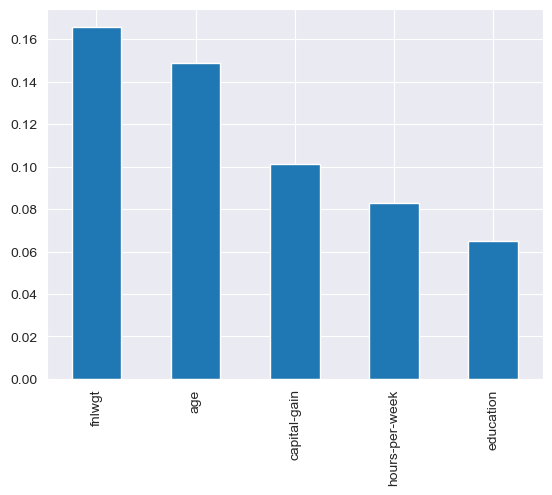

In [53]:
feature_importance.nlargest(5).plot(kind='bar')

## Hyperparameter Tuning

Hyperparameter tuning is the process of fine-tuning the model's hyperparameters to improve its performance on the prediction task.

First, let's try the train-validation-test method to play around with the hyperparameters. we'll use a 70%-15%-15% split.

array([<AxesSubplot: ylabel='0'>], dtype=object)

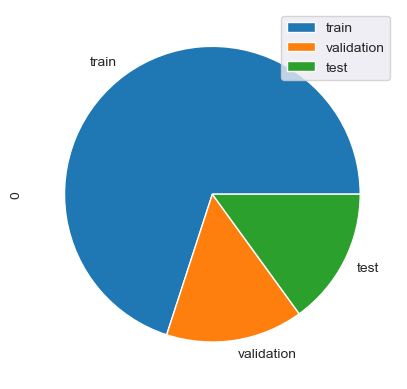

In [54]:
X_train, X_test_full, y_train, y_test_full = train_test_split(X, y, random_state=RANDOM_STATE, test_size=0.3, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test_full, y_test_full, random_state=RANDOM_STATE, test_size=0.5, stratify=y_test_full)

pd.DataFrame([len(y_train), len(y_val), len(y_test)], index=['train','validation', 'test']).plot(kind='pie', subplots=True)

Let's verify if the data has been split correctly.

<AxesSubplot: title={'center': 'test'}, ylabel='salary'>

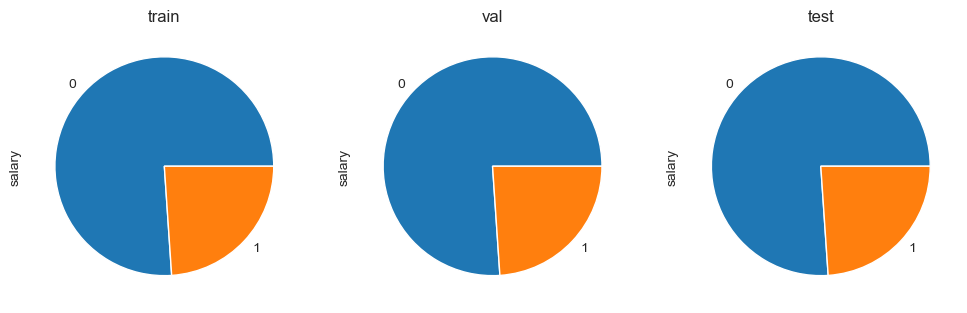

In [55]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,6))
y_train.value_counts().plot(kind='pie', ax=ax1, title='train')
y_val.value_counts().plot(kind='pie', ax=ax2, title='val')
y_test.value_counts().plot(kind='pie', ax=ax3, title='test')

Let's play with the hyperparameters and see if we can get a better result. We are starting with max depth.

In [56]:
dt_model = RandomForestClassifier(random_state=RANDOM_STATE)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_val)
accuracy_score = metrics.accuracy_score(y_val, y_pred)
print('Accuracy: {:.2%}'.format(accuracy_score))

Accuracy: 85.38%


In [57]:
def train_and_find_best_depth(X_train, X_val, y_train, y_val, do_print):
    result = None
    accuracy_max = -1
    for curr_max_depth in range(1, 20):
        dt_model = RandomForestClassifier(max_depth=curr_max_depth,random_state=RANDOM_STATE)
        dt_model.fit(X_train, y_train)
        y_pred = dt_model.predict(X_val)
        accuracy_score = metrics.accuracy_score(y_val, y_pred)

        if accuracy_score >= accuracy_max:
            accuracy_max = accuracy_score
            result = curr_max_depth
            if do_print:
                print('max depth {}: {:.2%} accuracy on validation set.'.format(curr_max_depth, accuracy_score))
            if do_print:
                print('-' * 20)
    print('best max depth {} has {:.2%} accuracy.'.format(result,accuracy_max))

    return result

best_max_depth = train_and_find_best_depth(X_train, X_val, y_train, y_val, True)

max depth 1: 76.07% accuracy on validation set.
--------------------
max depth 2: 77.63% accuracy on validation set.
--------------------
max depth 3: 81.44% accuracy on validation set.
--------------------
max depth 4: 83.20% accuracy on validation set.
--------------------
max depth 5: 83.91% accuracy on validation set.
--------------------
max depth 6: 83.92% accuracy on validation set.
--------------------
max depth 7: 84.67% accuracy on validation set.
--------------------
max depth 8: 84.73% accuracy on validation set.
--------------------
max depth 9: 85.11% accuracy on validation set.
--------------------
max depth 10: 85.27% accuracy on validation set.
--------------------
max depth 11: 85.49% accuracy on validation set.
--------------------
max depth 12: 85.57% accuracy on validation set.
--------------------
max depth 13: 85.68% accuracy on validation set.
--------------------
max depth 14: 85.78% accuracy on validation set.
--------------------
max depth 15: 85.90% accuracy

Next lets evaluate the best n estimators (number of trees in the forest).

In [58]:
def train_and_find_n_estimators(X_train, X_val, y_train, y_val, do_print):
    result = None
    accuracy_max = -1
    for n_estimators in range(1, 100):
        dt_model = RandomForestClassifier(n_estimators=n_estimators,random_state=RANDOM_STATE)
        dt_model.fit(X_train, y_train)
        y_pred = dt_model.predict(X_val)
        accuracy_score = metrics.accuracy_score(y_val, y_pred)

        if accuracy_score >= accuracy_max:
            accuracy_max = accuracy_score
            result = n_estimators
            if do_print:
                print('n estimators {}: {:.2%} accuracy on validation set.'.format(n_estimators, accuracy_score))
            if do_print:
                print('-' * 20)
    print('n estimators {} has {:.2%} accuracy.'.format(result,accuracy_max))

    return result

best_n_estimators = train_and_find_n_estimators(X_train, X_val, y_train, y_val, True)

n estimators 1: 80.19% accuracy on validation set.
--------------------
n estimators 2: 82.71% accuracy on validation set.
--------------------
n estimators 3: 82.88% accuracy on validation set.
--------------------
n estimators 4: 83.40% accuracy on validation set.
--------------------
n estimators 5: 83.76% accuracy on validation set.
--------------------
n estimators 6: 84.13% accuracy on validation set.
--------------------
n estimators 7: 84.26% accuracy on validation set.
--------------------
n estimators 8: 84.34% accuracy on validation set.
--------------------
n estimators 9: 84.56% accuracy on validation set.
--------------------
n estimators 12: 84.58% accuracy on validation set.
--------------------
n estimators 13: 84.78% accuracy on validation set.
--------------------
n estimators 16: 84.97% accuracy on validation set.
--------------------
n estimators 22: 85.18% accuracy on validation set.
--------------------
n estimators 28: 85.30% accuracy on validation set.
--------

Next lets adjust the min_samples_split parameter which is the minimal number of different data placed in a node before the node is split.

In [59]:
def train_and_find_min_samples_split(X_train, X_val, y_train, y_val, do_print):
    result = None
    accuracy_max = -1
    for min_samples_split in range(2, 20):
        dt_model = RandomForestClassifier(min_samples_split=min_samples_split,random_state=RANDOM_STATE)
        dt_model.fit(X_train, y_train)
        y_pred = dt_model.predict(X_val)
        accuracy_score = metrics.accuracy_score(y_val, y_pred)

        if accuracy_score >= accuracy_max:
            accuracy_max = accuracy_score
            result = min_samples_split
            if do_print:
                print('min samples split {}: {:.2%} accuracy on validation set.'.format(min_samples_split, accuracy_score))
            if do_print:
                print('-' * 20)
    print('min samples split {} has {:.2%} accuracy.'.format(result,accuracy_max))

    return result

min_samples_split = train_and_find_min_samples_split(X_train, X_val, y_train, y_val, True)

min samples split 2: 85.38% accuracy on validation set.
--------------------
min samples split 4: 85.60% accuracy on validation set.
--------------------
min samples split 6: 85.61% accuracy on validation set.
--------------------
min samples split 8: 85.74% accuracy on validation set.
--------------------
min samples split 13: 85.74% accuracy on validation set.
--------------------
min samples split 15: 85.82% accuracy on validation set.
--------------------
min samples split 17: 85.93% accuracy on validation set.
--------------------
min samples split 18: 85.94% accuracy on validation set.
--------------------
min samples split 18 has 85.94% accuracy.


Last but not least lets play with the max_features_parameter which is the max number of features who are considered when splitting a node.

In [60]:
def train_and_find_max_features(X_train, X_val, y_train, y_val, do_print):
    result = None
    accuracy_max = -1
    for max_features in range(1, 20):
        dt_model = RandomForestClassifier(max_features=max_features,random_state=RANDOM_STATE)
        dt_model.fit(X_train, y_train)
        y_pred = dt_model.predict(X_val)
        accuracy_score = metrics.accuracy_score(y_val, y_pred)

        if accuracy_score >= accuracy_max:
            accuracy_max = accuracy_score
            result = max_features
            if do_print:
                print('max features split {}: {:.2%} accuracy on validation set.'.format(max_features, accuracy_score))
            if do_print:
                print('-' * 20)
    print('max features split {} has {:.2%} accuracy.'.format(result,accuracy_max))

    return result

max_features = train_and_find_max_features(X_train, X_val, y_train, y_val, True)

max features split 1: 84.19% accuracy on validation set.
--------------------
max features split 2: 84.63% accuracy on validation set.
--------------------
max features split 3: 84.73% accuracy on validation set.
--------------------
max features split 4: 84.89% accuracy on validation set.
--------------------
max features split 5: 84.97% accuracy on validation set.
--------------------
max features split 7: 85.11% accuracy on validation set.
--------------------
max features split 8: 85.22% accuracy on validation set.
--------------------
max features split 9: 85.38% accuracy on validation set.
--------------------
max features split 14: 85.42% accuracy on validation set.
--------------------
max features split 16: 85.42% accuracy on validation set.
--------------------
max features split 16 has 85.42% accuracy.


## Evaluation

The evaluation phase involves assessing the performance of the model on a set of unknown realistic data to the model.
This process is usually done by comparing the predicted values to the true values, and calculating metrics such as accuracy, precision, and recall.

In [62]:
dt_model = RandomForestClassifier(max_depth=best_max_depth,n_estimators=best_n_estimators, random_state=RANDOM_STATE, min_samples_split=min_samples_split,max_features=max_features)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
accuracy_score_imputed = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_test, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_test, y_pred)))
print('F1 Score: {:.2%}'.format(metrics.f1_score(y_test, y_pred)))

Accuracy: 86.35%
Recall: 60.13%
Precision: 77.79%
F1 Score: 67.82%


When we used the train-validation-test method without any hyperparameters as well as for the random forest, we reached an accuracy of 85%. By adding hyperparameters, it raised to 86%.
